# Review MRI

In [1]:
# import visualization functions
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
sys.path.append("/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/src/models")
sys.path

['/home/wezw/.conda/envs/first_env/lib/python312.zip',
 '/home/wezw/.conda/envs/first_env/lib/python3.12',
 '/home/wezw/.conda/envs/first_env/lib/python3.12/lib-dynload',
 '',
 '/home/wezw/.conda/envs/first_env/lib/python3.12/site-packages',
 '/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection',
 '/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/src/models']

Reading DICOM (examining files): 1/80 files (1.2%80/80 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 80/80  (100.0%)


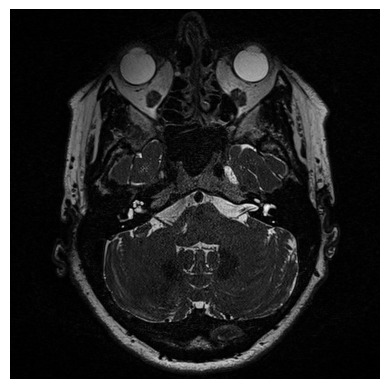

In [14]:
import imageio as iio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

dicom_AH_MR_path = '/data/gpfs/projects/punim1836/Data/raw/CT_MRI_Pre_Post/AH MR'
head_vol = iio.volread(dicom_AH_MR_path, 'DICOM')

head_vol.shape

# [[[539.  410.5  44. ]
#   [534.5 426.   42. ]
#   [241.  421.   50. ]
#   [248.  436.   47. ]]

plt.imshow(head_vol[44], cmap='grey')
plt.axis('off')
plt.show()

In [16]:
sampling = head_vol.meta['sampling']
pixel_space = [sampling[1], sampling[2], sampling[0]]

In [17]:
head_vol_array = np.moveaxis(np.asarray(head_vol), 0 ,2)

In [21]:
base_save_dir = "../data/processed/Y"

roi_MR_medium = np.load(f"{base_save_dir}/ROI_MR_Medium.npy")

roi:  [[539.  410.5  44. ]
 [534.5 426.   42. ]
 [241.  421.   50. ]
 [248.  436.   47. ]]


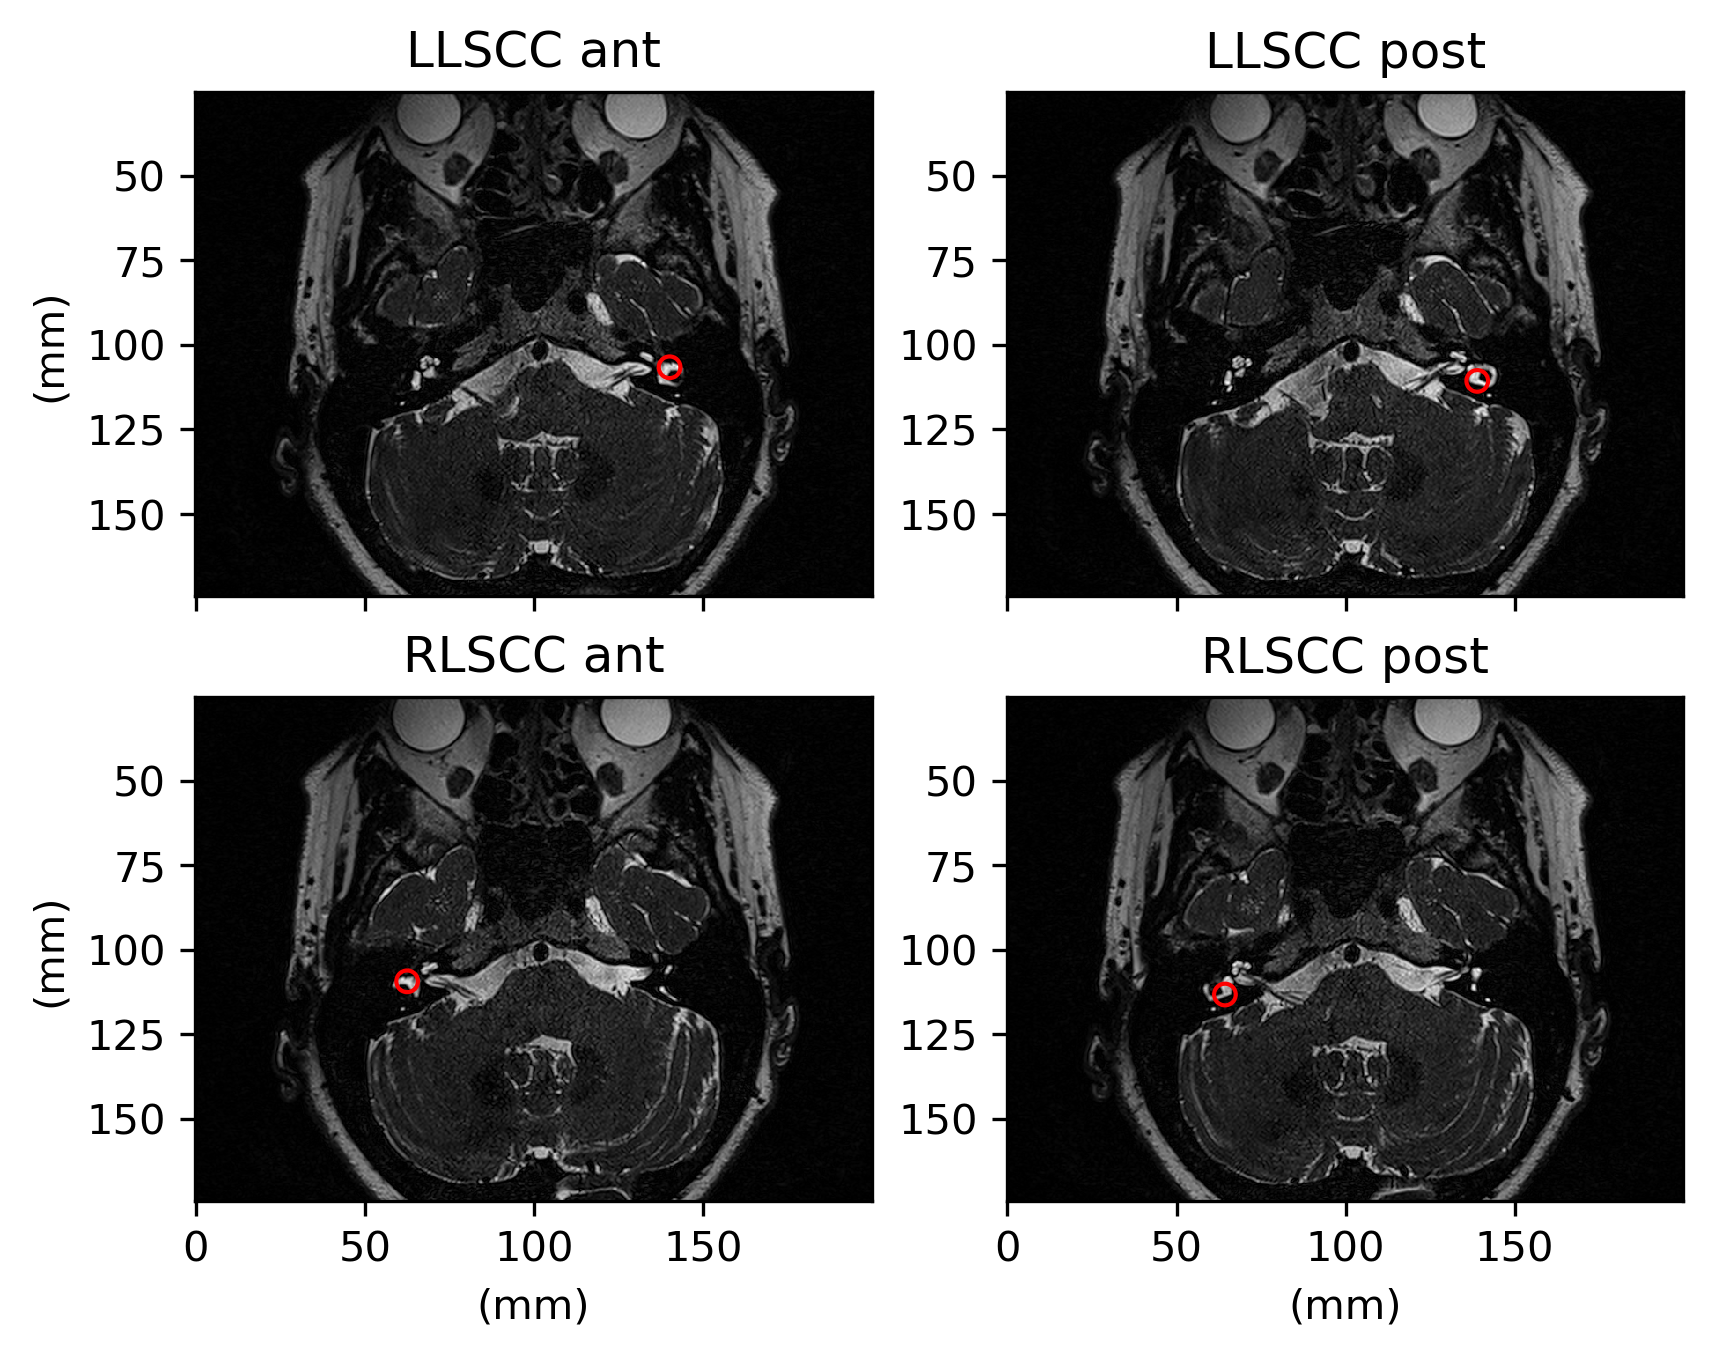

In [22]:
import numpy as np
import importlib
import common.MyDataset as MyDataset
import common.Visualization as Visualization

importlib.reload(Visualization)

print("roi: ", roi_MR_medium[0])

Visualization.show_pts(head_vol_array, roi_MR_medium[0], pixel_space)

## original MRI

In [ ]:
import h5py

## augmented MRI

# Pre-Process MRI

## rescale and divide?

# Prepare Registration

## combine divided images (CT and MRI)

## predict the landmarks and transfer to pair with full images (CT and MRI)